## pix2pix(U-Net + GAN) experiments

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.WARN)

### Model definitions

In [2]:
from utils import load_dataset, save_p2p_models, load_p2p_models
from utils import plot_p2p_models, plot_p2p_losses, gen_nn_output
from utils import three_image_generators
from models import g_unet, discriminator, pix2pix
from train import train

Using TensorFlow backend.


### Dataset loading + preprocessing

In [3]:
W = 256
H = 256
dataset_path = '../data/sand'
trend_num = 2
side1_train, side2_train, panorama_train, side1_val, side2_val, panorama_val, N_train, N_val = load_dataset(
    dataset_path, trend_num=2, mode=3, W=W, H=H)

Validation dataset: 100%|██████████| 16/16 [00:00<00:00, 102.31it/s]


In [4]:
batch_size = 4
train_gen, val_gen = three_image_generators(
    side1_train, side2_train, panorama_train, side1_val, side2_val, panorama_val, batch_size=batch_size)

### Training

In [5]:
models_path = 'trained_models/sand'
trend_num = 2
nn_name = 'nf16_3x3_woUnet'

In [6]:
# создание моделей
nf = 16
f_gen = g_unet(nf)
d = discriminator(nf)
p2p = pix2pix(f_gen, d)
plot_p2p_models(models_path, trend_num, nn_name, f_gen, d, p2p)
#tbCallback = create_tb_callback(models_path, trend_num, nn_name)

Dir already exist


In [7]:
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=2,
               train_samples=16, val_samples=16, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)

Epoch 1/1
4/4 [==============================] - 1s - loss: 0.6722     
Epoch 1/1
4/4 [==============================] - 2s - loss: 103.6428     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.6256     
Epoch 1/1
4/4 [==============================] - 1s - loss: 102.4352     

### Trained NN

In [52]:
f_gen, d, losses = load_p2p_models(models_path, trend_num, nn_name)
p2p = pix2pix(f_gen, d)

Dir already exist


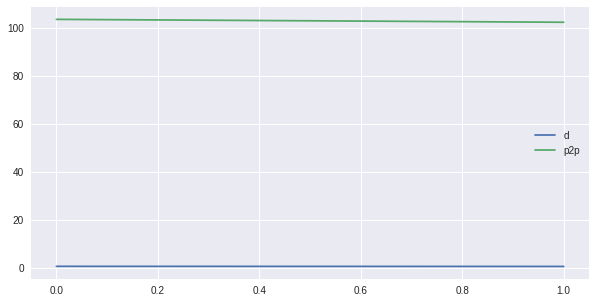

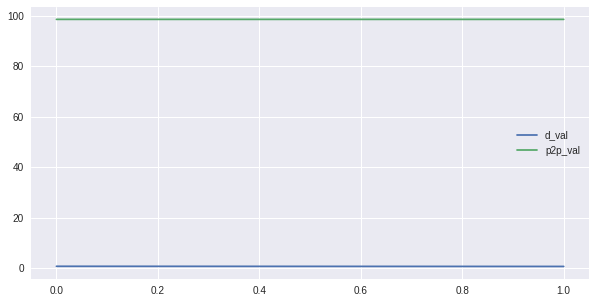

In [8]:
plot_p2p_losses(models_path, trend_num, nn_name, losses)

In [10]:
s1, s2, pan, gen = gen_nn_output(models_path, trend_num, nn_name, f_gen, val_gen, 3, W, H)

Dir already exist
NN output saved successfully.


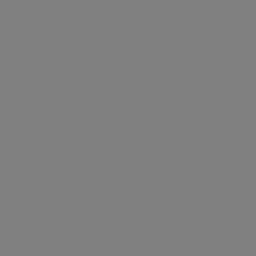

In [13]:
gen[2]

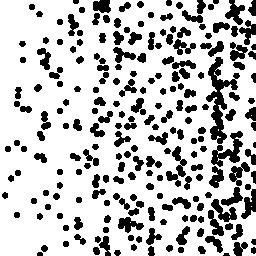

In [15]:
pan[2]